In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

## Load data here


In [32]:
df = pd.read_csv('time_series_19-covid-Deaths.csv')
#df = df.drop(['Province/State', 'Lat', 'Long'], axis = 1)
#df = df.groupby(['Country/Region']).sum()
df[df.]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,10,10,15,16,19,22,22,27,29,29
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Aruba,Netherlands,12.5186,-70.0358,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458,NaN,Zambia,-15.4167,28.2833,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
459,NaN,Djibouti,11.8251,42.5903,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
460,NaN,"Gambia, The",13.4432,-15.3101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df2 = df.transpose()

df2

Province/State    Reunion
Country/Region     France
Lat              -21.1351
Long              55.2471
1/22/20                 0
                   ...   
3/14/20                 0
3/15/20                 0
3/16/20                 0
3/17/20                 0
3/18/20                 0
Name: 452, Length: 61, dtype: object

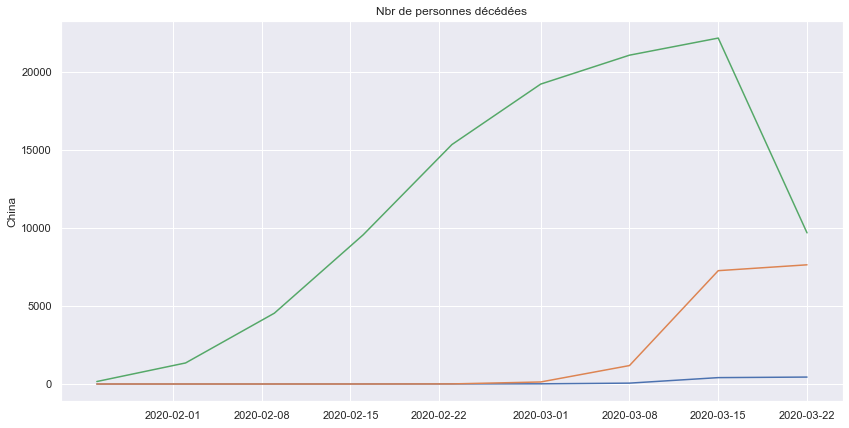

In [11]:
df2.index = pd.to_datetime(df2.index, infer_datetime_format=True)
df_week = df2.resample("W").sum()
sns.set(rc={'figure.figsize':(14,7)})
plt.title("Nbr de personnes décédées")

sns.lineplot(x = df_week.index, y = df_week.France)

sns.lineplot(x = df_week.index, y = df_week.Italy)

sns.lineplot(x = df_week.index, y = df_week.China)

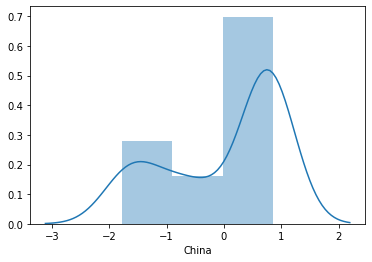

In [87]:
att = df2.columns
scale = preprocessing.scale(df2)
scale = pd.DataFrame(scale)
scale.columns = att
scale = scale.loc[:, ['France', 'Italy', 'China']]
sns.distplot(scale['China'])
